In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv(r"D:\srm\gen-Y\ML algo's\Learning\data.csv")

In [3]:
df.head


<bound method NDFrame.head of      bedrooms  floors  yr_built   price
0           3     1.0      1955  221900
1           3     2.0      1951  538000
2           2     1.0      1933  180000
3           4     1.0      1965  604000
4           3     1.0      1987  510000
..        ...     ...       ...     ...
395         2     1.0      1950  330000
396         5     1.0      1958  530000
397         4     1.0      1962  365000
398         3     1.5      1909  378750
399         4     1.5      1968  269900

[400 rows x 4 columns]>

In [4]:
df.describe

<bound method NDFrame.describe of      bedrooms  floors  yr_built   price
0           3     1.0      1955  221900
1           3     2.0      1951  538000
2           2     1.0      1933  180000
3           4     1.0      1965  604000
4           3     1.0      1987  510000
..        ...     ...       ...     ...
395         2     1.0      1950  330000
396         5     1.0      1958  530000
397         4     1.0      1962  365000
398         3     1.5      1909  378750
399         4     1.5      1968  269900

[400 rows x 4 columns]>

In [5]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm=(X-mean)/std
    return X_norm, mean, std

In [6]:
def cost_function(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

In [7]:
data_n=df.values
m=len(data_n[:,-1])
X=data_n[:,0:3].reshape(m,3)
X, mean_X, std_X= featureNormalization(X)
X=np.append(np.ones((m,1)),X,axis=1)
y=data_n[:,-1].reshape(m,1)
theta=np.zeros((4 ,1))


In [8]:
cost_function(X,y,theta)

200335869922.49875

In [9]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(cost_function(X,y,theta))
    
    return theta, J_history


In [10]:
theta, J_history= gradientDescent(X,y,theta,0.1,400)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1 + "+str(round(theta[2,0],2))+"x2")

h(x) =520026.93 + 101958.89x1 + 58621.83x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

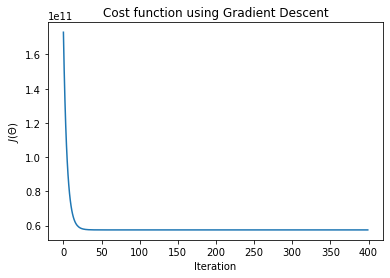

In [11]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [12]:
def predict(x,theta):
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]


In [13]:
x_sample= featureNormalization(np.array([3,2,1982]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict=predict(x_sample,theta)
print("For house of 3 bedrooms, on 2nd floor, built in year 1982, we predict a price of"+str(round(predict,0)))

For house of 3 bedrooms, on 2nd floor, built in year 1982, we predict a price of370305.0
